# 📘 Análise Estatística: Desempenho dos Alunos

## 1. Importação de bibliotecas
Nesta seção, carregamos todas as bibliotecas necessárias para manipulação dos dados, visualização gráfica e modelagem estatística.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

## 2. Carregamento e tratamento inicial da base
Carregamos a base original, verificamos valores ausentes, aplicamos tratamento e normalização das variáveis.

In [10]:
file_path = "/home/pedro/Estudos/Estatistica/projetoEstatistica/Desempenho_Alunos.xlsx"  # base bruta
raw_df = pd.read_excel(file_path)

print("Valores ausentes por coluna:")
print(raw_df.isnull().sum())

# Tratamento: remover valores ausentes (ou preencher com média)
df = raw_df.dropna()

# One-hot encoding para variáveis categóricas
df = pd.get_dummies(df, columns=["atividade_extracurricular", "nivel_socioeconomico"], drop_first=True)

# Padronização de variáveis numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Salvar base tratada
df.to_excel("Desempenho_Alunos_tratado.xlsx", index=False)
print("Base tratada salva.")

Valores ausentes por coluna:
idade                         0
horas_estudo                 10
frequencia                    0
atividade_extracurricular     0
nivel_socioeconomico          0
motivacao                     0
notas_anteriores              8
sono                          0
desempenho                    0
dtype: int64
Base tratada salva.


## 3. Análise Exploratória de Dados (EDA)
Aqui investigamos as características gerais da base de dados, sua distribuição e possíveis outliers.

VISÃO GERAL DA BASE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   idade                          1979 non-null   float64
 1   horas_estudo                   1979 non-null   float64
 2   frequencia                     1979 non-null   float64
 3   motivacao                      1979 non-null   float64
 4   notas_anteriores               1979 non-null   float64
 5   sono                           1979 non-null   float64
 6   desempenho                     1979 non-null   float64
 7   atividade_extracurricular_Sim  1979 non-null   bool   
 8   nivel_socioeconomico_Baixo     1979 non-null   bool   
 9   nivel_socioeconomico_Médio     1979 non-null   bool   
dtypes: bool(3), float64(7)
memory usage: 114.2 KB
None

Estatísticas descritivas:
              idade  horas_estudo    frequencia     motivacao  \
count

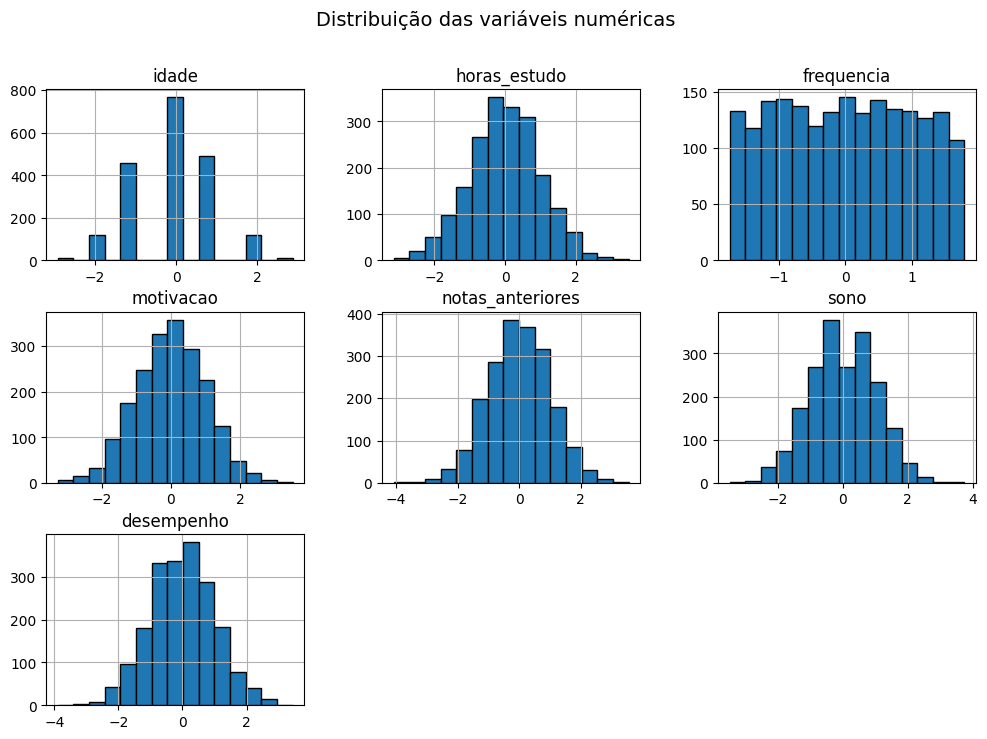

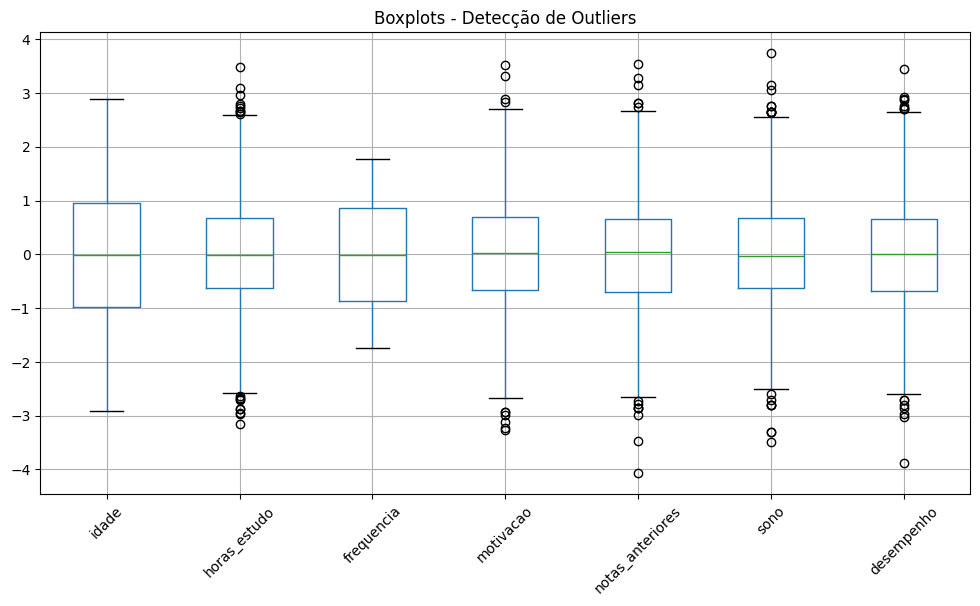

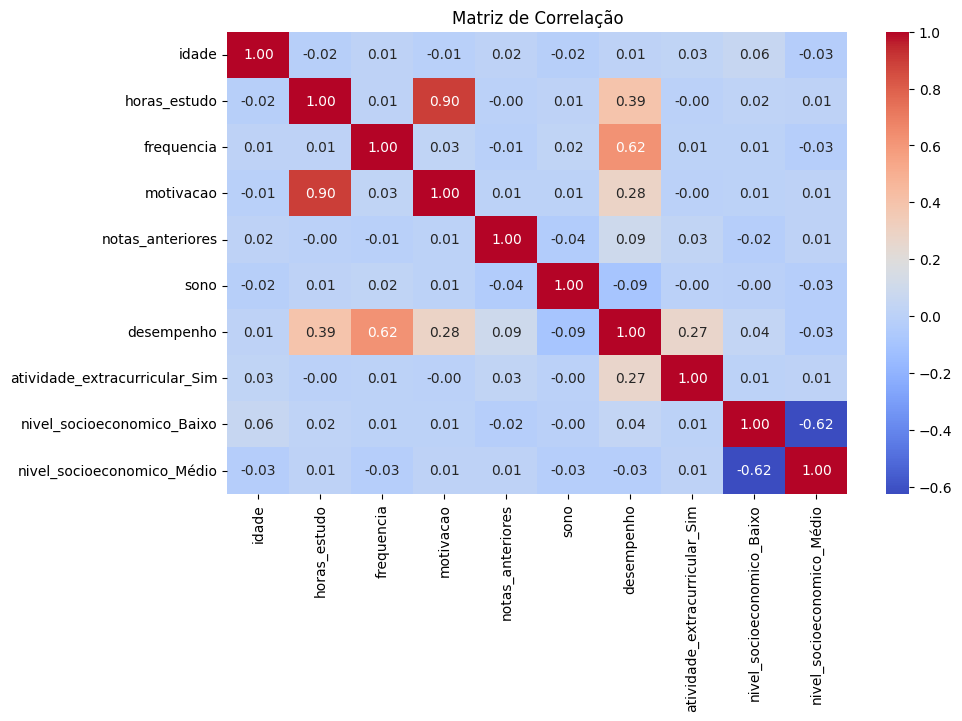

In [11]:
df = pd.read_excel("Desempenho_Alunos_tratado.xlsx")

print("VISÃO GERAL DA BASE")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())

# Histogramas
df.hist(figsize=(12,8), bins=15, edgecolor="black")
plt.suptitle("Distribuição das variáveis numéricas", fontsize=14)
plt.show()

# Boxplots
plt.figure(figsize=(12,6))
df.select_dtypes(include=["float64", "int64"]).boxplot()
plt.title("Boxplots - Detecção de Outliers")
plt.xticks(rotation=45)
plt.show()

# Correlação
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

## 4. Regressão Linear Simples
Avaliação do impacto de uma única variável independente (**horas de estudo**) sobre o desempenho.

Regressão Linear Simples (MRLS)
Equação: desempenho = 0.394 * horas_estudo + -0.000
R²: 0.155


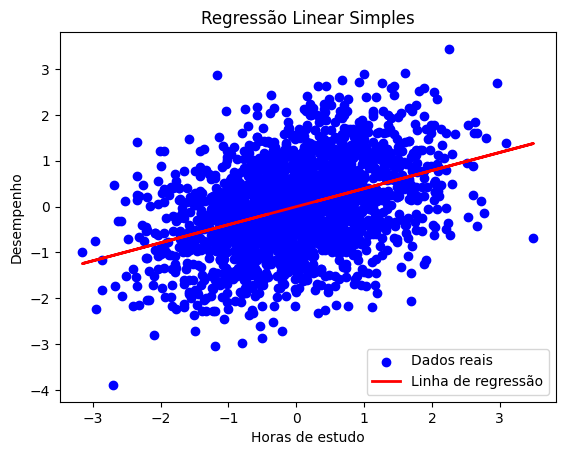

In [12]:
X_mrls = df[["horas_estudo"]]
y = df["desempenho"]

model_mrls = LinearRegression()
model_mrls.fit(X_mrls, y)
y_pred = model_mrls.predict(X_mrls)

print("Regressão Linear Simples (MRLS)")
print(f"Equação: desempenho = {model_mrls.coef_[0]:.3f} * horas_estudo + {model_mrls.intercept_:.3f}")
print(f"R²: {model_mrls.score(X_mrls, y):.3f}")

plt.scatter(X_mrls, y, color="blue", label="Dados reais")
plt.plot(X_mrls, y_pred, color="red", linewidth=2, label="Linha de regressão")
plt.xlabel("Horas de estudo")
plt.ylabel("Desempenho")
plt.title("Regressão Linear Simples")
plt.legend()
plt.show()

## 5. Regressão Linear Múltipla
Modelo com múltiplas variáveis explicativas para prever o desempenho.

Regressão Linear Múltipla (MRLM)
0.000 * idade + 0.750 * horas_estudo + 0.628 * frequencia + -0.404 * motivacao + 0.093 * notas_anteriores + -0.110 * sono + 0.535 * atividade_extracurricular_Sim + 0.033 * nivel_socioeconomico_Baixo + -0.021 * nivel_socioeconomico_Médio + Intercepto: -0.214
R²: 0.663


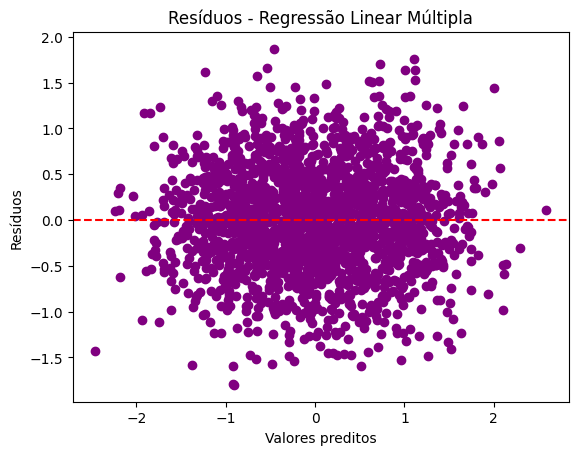

In [13]:
X_mrlm = df.drop(columns=["desempenho"])
y = df["desempenho"]

model_mrlm = LinearRegression()
model_mrlm.fit(X_mrlm, y)
y_pred = model_mrlm.predict(X_mrlm)
residuos = y - y_pred

print("Regressão Linear Múltipla (MRLM)")
for col, coef in zip(X_mrlm.columns, model_mrlm.coef_):
    print(f"{coef:.3f} * {col}", end=" + ")
print(f"Intercepto: {model_mrlm.intercept_:.3f}")
print(f"R²: {model_mrlm.score(X_mrlm, y):.3f}")

plt.scatter(y_pred, residuos, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores preditos")
plt.ylabel("Resíduos")
plt.title("Resíduos - Regressão Linear Múltipla")
plt.show()

## 6. Regressão com Statsmodels + Eliminação Retroativa
Aplicação de um processo iterativo que remove variáveis não significativas (p-valor > 0.05).

In [16]:
X = df.drop('desempenho', axis=1)
y = df['desempenho']

# 3. Identificar e processar variáveis
variaveis_numericas = X.select_dtypes(include=np.number).columns.tolist()
variaveis_categoricas = X.select_dtypes(include='object').columns.tolist()

# Converter colunas numéricas que possam estar como object
for col in variaveis_numericas:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Tratar valores nulos (substituir por média)
X[variaveis_numericas] = X[variaveis_numericas].fillna(X[variaveis_numericas].mean())

# Padronizar as variáveis numéricas
scaler = StandardScaler()
X[variaveis_numericas] = scaler.fit_transform(X[variaveis_numericas])

# Aplicar One-Hot Encoding nas variáveis categóricas
X = pd.get_dummies(X, columns=variaveis_categoricas, drop_first=True)

# Adicionar uma constante (intercepto)
X = sm.add_constant(X)

# Certificar que todos os dados são numéricos
X = X.astype(float)

# 4. Processo de Eliminação Retroativa
variaveis_a_manter = X.columns.tolist()
modelo_final = None

while True:
    X_atual = X[variaveis_a_manter]
    modelo = sm.OLS(y, X_atual).fit()
    
    # Encontrar variável com maior p-value (exceto constante)
    p_valores = modelo.pvalues.drop('const')
    maior_p_valor = p_valores.max()
    variavel_a_remover = p_valores.idxmax()
    
    if maior_p_valor > 0.05:
        print(f"Removendo '{variavel_a_remover}' (p-value: {maior_p_valor:.4f})")
        variaveis_a_manter.remove(variavel_a_remover)
    else:
        print("\nTodas as variáveis restantes são significativas (p < 0.05).")
        modelo_final = modelo
        break

# 5. Resumo do modelo final
print("\n--- Resumo do Modelo Final ---")
print(modelo_final.summary())


# Definir dois novos conjuntos de valores para as variáveis explicativas
# Atenção: deve conter todas as variáveis que ficaram no modelo_final, exceto a constante
xh1 = X[variaveis_a_manter].iloc[0].copy()  # Exemplo: primeira linha original
xh2 = X[variaveis_a_manter].iloc[1].copy()  # Exemplo: segunda linha original

# Garantir que a constante está presente
xh1['const'] = 1
xh2['const'] = 1

# Criar DataFrame com as observações
X_novas = pd.DataFrame([xh1, xh2])

# 1. Previsões pontuais e intervalos de confiança da média esperada E(Y|X)
pred_media = modelo_final.get_prediction(X_novas)
intervalo_media = pred_media.summary_frame(alpha=0.05)  # 95% de confiança

print("\n--- Previsões Pontuais e Intervalos de Confiança da Média Esperada ---")
print(intervalo_media[['mean', 'mean_ci_lower', 'mean_ci_upper']])

# 2. Previsões pontuais e intervalos de predição para novas observações Yh
intervalo_predicao = pred_media.summary_frame(alpha=0.05)  # mesmo objeto já possui 'obs_ci'
print("\n--- Previsões Pontuais e Intervalos de Predição para Novas Observações ---")
print(intervalo_predicao[['mean', 'obs_ci_lower', 'obs_ci_upper']])

Removendo 'idade' (p-value: 0.9958)
Removendo 'nivel_socioeconomico_Médio' (p-value: 0.5266)
Removendo 'nivel_socioeconomico_Baixo' (p-value: 0.1072)

Todas as variáveis restantes são significativas (p < 0.05).

--- Resumo do Modelo Final ---
                            OLS Regression Results                            
Dep. Variable:             desempenho   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     646.2
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:29:56   Log-Likelihood:                -1732.3
No. Observations:                1979   AIC:                             3479.
Df Residuals:                    1972   BIC:                             3518.
Df Model:                           6                                         
Covariance Type:            nonrobust         

## 7. Verificação de pressupostos
Nesta etapa verificamos os pressupostos da regressão linear: linearidade, normalidade dos resíduos, homocedasticidade, independência e multicolinearidade.

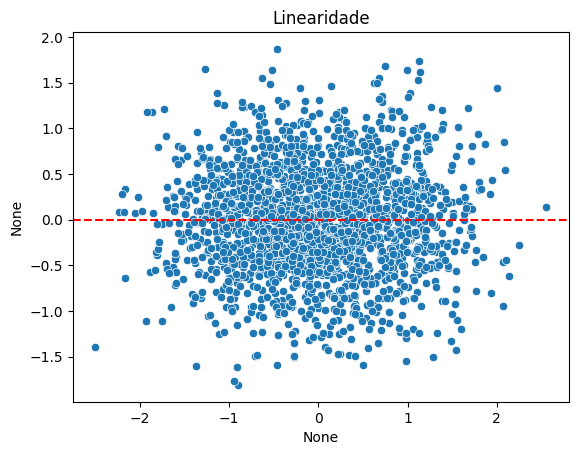

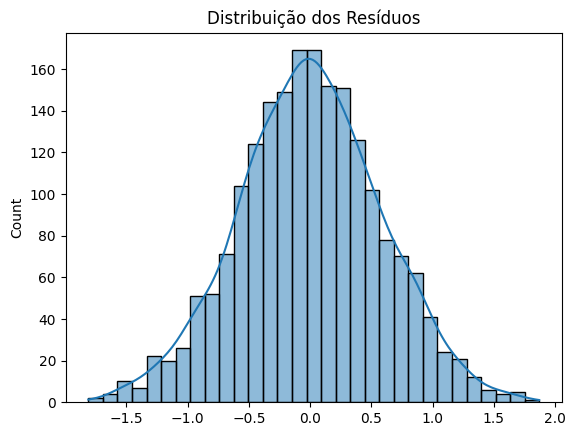

Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.999229685161281), pvalue=np.float64(0.6003368267454892))


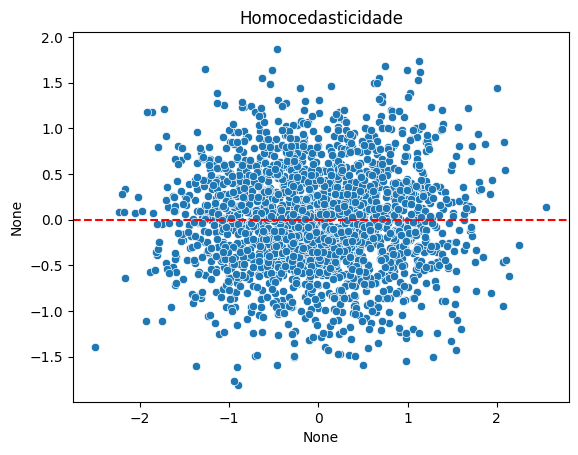

Durbin-Watson: 2.0973965418372136
                        Variável       VIF
0                          const  5.264192
1                          idade  1.005419
2                   horas_estudo  5.045665
3                     frequencia  1.003136
4                      motivacao  5.044017
5               notas_anteriores  1.004142
6                           sono  1.004374
7  atividade_extracurricular_Sim  1.002216
8     nivel_socioeconomico_Baixo  1.648644
9     nivel_socioeconomico_Médio  1.644702


In [17]:
residuos = modelo_final.resid
y_pred = modelo_final.fittedvalues

# Linearidade
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Linearidade")
plt.show()

# Normalidade
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()
print("Shapiro-Wilk:", shapiro(residuos))

# Homocedasticidade
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Homocedasticidade")
plt.show()

# Independência
dw = durbin_watson(residuos)
print("Durbin-Watson:", dw)

# Multicolinearidade
vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)